In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
import datetime
%matplotlib notebook


#adding dependencies for API pulls
import requests
from pprint import pprint
from config import access_key

In [44]:
# Reference files
stocks_10yr_df = pd.read_csv("Resources/stocks_10yr_df.csv")
stocks_2020_df = pd.read_csv("Resources/stocks_2020_df.csv")
reduced_data = pd.read_csv("Resources/reduced_data.csv")
month_data_df = pd.read_csv("Resources/month_data_df.csv")
countries_data = pd.read_csv("Resources/countries_data.csv")
currencyDF2020 = pd.read_csv("Resources/currencyDF2020.csv")
currencydf = pd.read_csv("Resources/currencydf.csv")
countries_deaths = pd.read_csv("Resources/countries_deaths.csv")

<IPython.core.display.Javascript object>


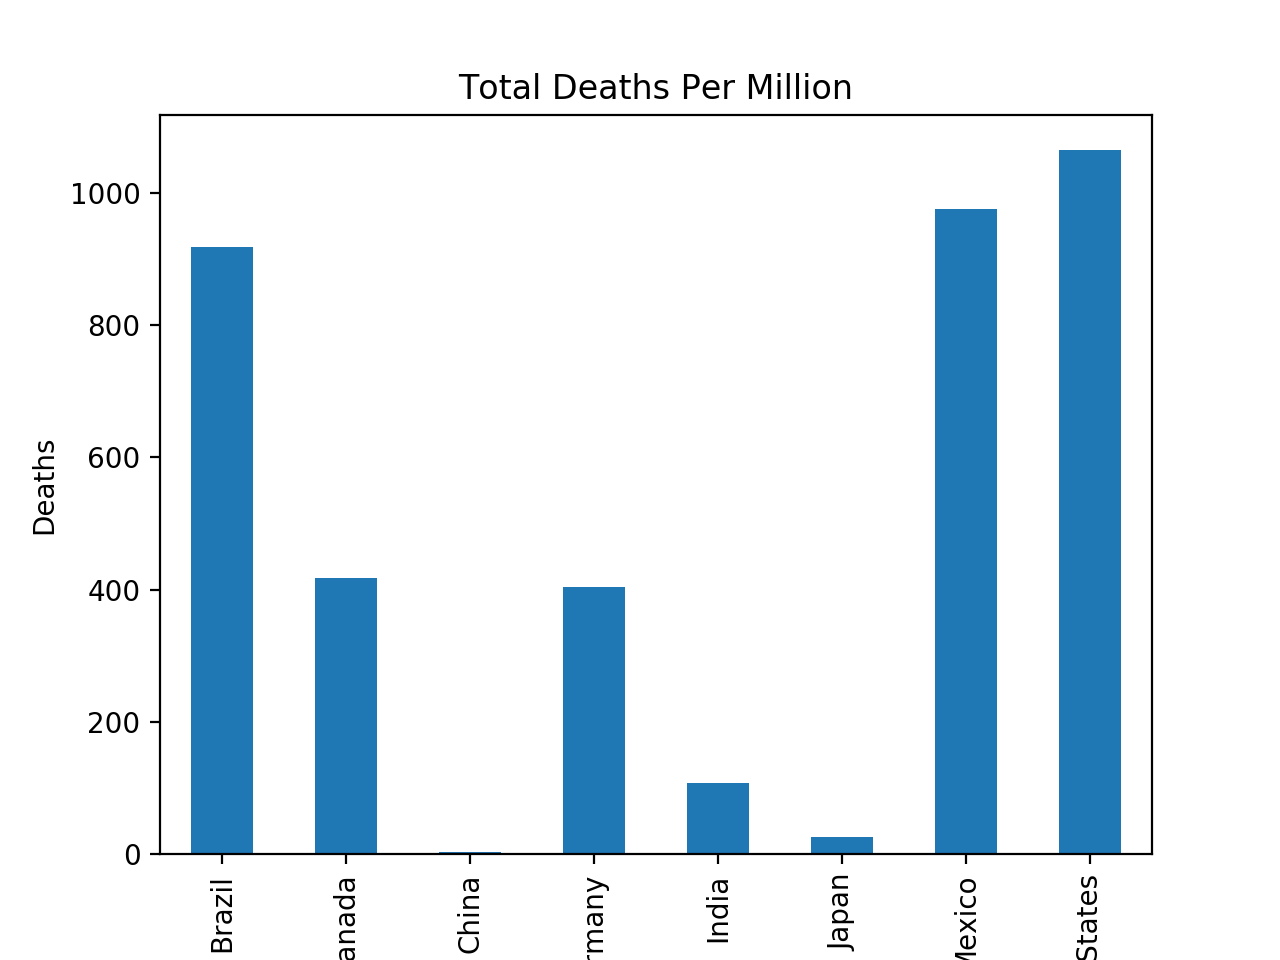

In [45]:
#bar chart of each countries death per millions
countries_deaths = countries_data.groupby(["location"])["total_deaths_per_million"].max()

#bar chart of deaths for each country

bar_plot = countries_deaths.plot(kind = "bar")

#labels
plt.title("Total Deaths Per Million")
plt.xlabel("Country")
plt.ylabel("Deaths")

plt.show()

<IPython.core.display.Javascript object>


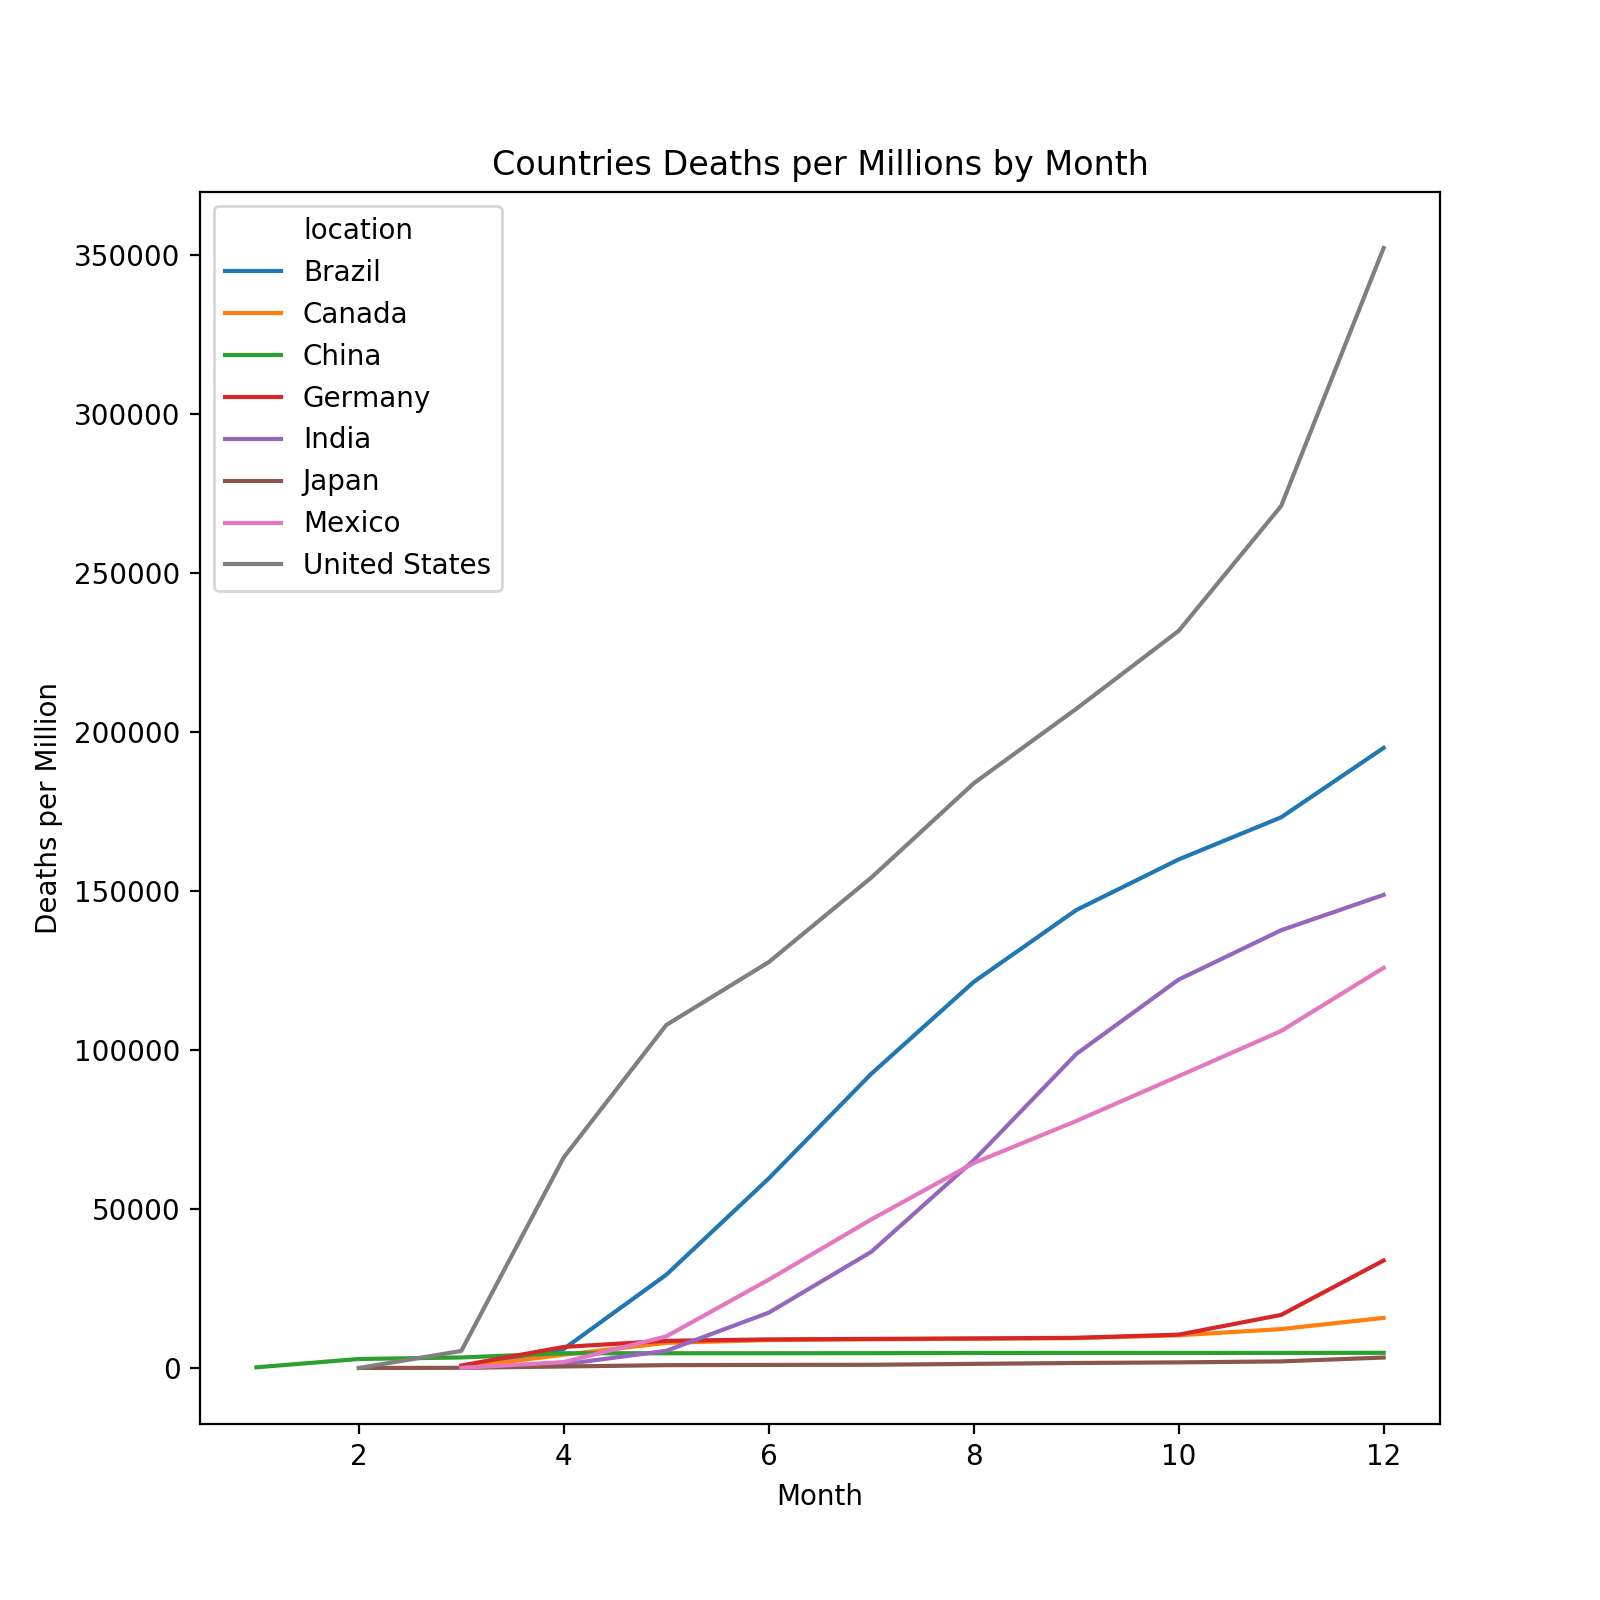

Text(0.5, 1.0, 'Countries Deaths per Millions by Month')

In [47]:
#line chart of countries deaths per month
# plot data
fig, ax = plt.subplots(figsize=(8,8))
# use unstack()
reduced_data.groupby(["month","location"])["total_deaths"].last().unstack().plot(ax=ax)
ax.set_xlabel("Month")
ax.set_ylabel("Deaths per Million")
ax.set_title("Countries Deaths per Millions by Month")